<a href="https://colab.research.google.com/github/popuricharan666/Mini-Project/blob/main/Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing_image-downloader
!pip install ipython-autotime
%load_ext autotime

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("cat",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
downloader.download("dog",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
downloader.download("parrot",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import os

target = []
images = []
flat_data = []
DATADIR = '/content/images'
CATEGORIES = ['wild cat', 'dog', 'parrot']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 1min 9s (started: 2021-02-21 10:17:55 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)

time: 1.12 ms (started: 2021-02-21 10:19:12 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)


time: 30.1 ms (started: 2021-02-21 10:19:14 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)  

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1])

time: 420 ms (started: 2021-02-21 10:24:06 +00:00)


In [ ]:
y_test

array([1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2])

time: 4.25 ms (started: 2021-02-21 10:24:13 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6585365853658537

time: 4.85 ms (started: 2021-02-21 10:24:20 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 5,  3,  4],
       [ 2, 11,  3],
       [ 0,  2, 11]])

time: 5.19 ms (started: 2021-02-21 10:24:24 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 95.2 ms (started: 2021-02-21 10:24:47 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))


time: 31.6 ms (started: 2021-02-21 10:24:51 +00:00)


Enter your URL: https://lafeber.com/pet-birds/wp-content/uploads/2018/06/Indian-Ring-Necked-Parakeet.jpg
(600, 600, 3)
PREDICTED OUTPUT: parrot


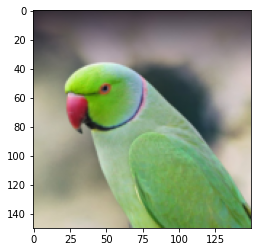

time: 4.12 s (started: 2021-02-21 16:13:41 +00:00)


In [ ]:
flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')